<a href="https://colab.research.google.com/github/paulinawdowiak1/ML-Bootcamp/blob/main/unsupervised/ML_Bootcamp_07_pca_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### <a name='0'></a> Import bibliotek

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

np.set_printoptions(precision=4, suppress=True, linewidth=150)

### <a name='1'></a> Załadowanie danych - breast cancer

In [58]:
from sklearn.datasets import load_breast_cancer

raw_data = load_breast_cancer()
all_data = raw_data.copy()
data = all_data['data']
target = all_data['target']
data[:3]

array([[  17.99  ,   10.38  ,  122.8   , 1001.    ,    0.1184,    0.2776,    0.3001,    0.1471,    0.2419,    0.0787,    1.095 ,    0.9053,
           8.589 ,  153.4   ,    0.0064,    0.049 ,    0.0537,    0.0159,    0.03  ,    0.0062,   25.38  ,   17.33  ,  184.6   , 2019.    ,
           0.1622,    0.6656,    0.7119,    0.2654,    0.4601,    0.1189],
       [  20.57  ,   17.77  ,  132.9   , 1326.    ,    0.0847,    0.0786,    0.0869,    0.0702,    0.1812,    0.0567,    0.5435,    0.7339,
           3.398 ,   74.08  ,    0.0052,    0.0131,    0.0186,    0.0134,    0.0139,    0.0035,   24.99  ,   23.41  ,  158.8   , 1956.    ,
           0.1238,    0.1866,    0.2416,    0.186 ,    0.275 ,    0.089 ],
       [  19.69  ,   21.25  ,  130.    , 1203.    ,    0.1096,    0.1599,    0.1974,    0.1279,    0.2069,    0.06  ,    0.7456,    0.7869,
           4.585 ,   94.03  ,    0.0062,    0.0401,    0.0383,    0.0206,    0.0225,    0.0046,   23.57  ,   25.53  ,  152.5   , 1709.    ,
          

In [59]:
target[:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [60]:
data.shape

(569, 30)

### <a name='2'></a> Standaryzacja

In [61]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data_std = scaler.fit_transform(data)
data_std[:3]

array([[ 1.0971, -2.0733,  1.2699,  0.9844,  1.5685,  3.2835,  2.6529,  2.5325,  2.2175,  2.2557,  2.4897, -0.5653,  2.833 ,  2.4876, -0.214 ,
         1.3169,  0.724 ,  0.6608,  1.1488,  0.9071,  1.8867, -1.3593,  2.3036,  2.0012,  1.3077,  2.6167,  2.1095,  2.2961,  2.7506,  1.937 ],
       [ 1.8298, -0.3536,  1.686 ,  1.9087, -0.827 , -0.4871, -0.0238,  0.5481,  0.0014, -0.8687,  0.4993, -0.8762,  0.2633,  0.7424, -0.6054,
        -0.6929, -0.4408,  0.2602, -0.8055, -0.0994,  1.8059, -0.3692,  1.5351,  1.8905, -0.3756, -0.4304, -0.1467,  1.0871, -0.2439,  0.2812],
       [ 1.5799,  0.4562,  1.5665,  1.5589,  0.9422,  1.0529,  1.3635,  2.0372,  0.9397, -0.398 ,  1.2287, -0.7801,  0.8509,  1.1813, -0.297 ,
         0.815 ,  0.2131,  1.4248,  0.237 ,  0.2936,  1.5119, -0.024 ,  1.3475,  1.4563,  0.5274,  1.0829,  0.855 ,  1.955 ,  1.1523,  0.2014]])

### <a name='3'></a> PCA - 2 komponenty

In [62]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486],
       [ 2.3878, -3.7682],
       [ 5.7339, -1.0752],
       [ 7.123 , 10.2756],
       [ 3.9353, -1.9481]])

In [63]:
pca_2 = pd.DataFrame(data={'pca_1': data_pca[:,0], 'pca_2': data_pca[:,1], 'class': target})
pca_2.replace(0, 'Benign', inplace=True)
pca_2.replace(1, 'Malignant', inplace=True)
pca_2.head()

,pca_1,pca_2,class
0,9.192837,1.948583,Benign
1,2.387802,-3.768172,Benign
2,5.733896,-1.075174,Benign
3,7.122953,10.275589,Benign
4,3.935302,-1.948072,Benign


In [64]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative']= results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2


In [65]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 2 components', width=950, template='plotly_dark'))
fig.show()

In [66]:
px.scatter(pca_2, 'pca_1', 'pca_2', color=pca_2['class'], width=950, template='plotly_dark')

### <a name='4'></a> PCA - 3 komponenty

In [67]:
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_std)
data_pca[:5]

array([[ 9.1928,  1.9486, -1.1232],
       [ 2.3878, -3.7682, -0.5293],
       [ 5.7339, -1.0752, -0.5517],
       [ 7.123 , 10.2756, -3.2328],
       [ 3.9353, -1.9481,  1.3898]])

In [68]:
pca_3 = pd.DataFrame(data={'pca_1': data_pca[:, 0], 'pca_2': data[:, 1], 'pca_3': data_pca[:,2], 'class':target})
pca_3.replace(0, 'Benign', inplace=True)
pca_3.replace(1, 'Malignant', inplace=True)
pca_3.head()

,pca_1,pca_2,pca_3,class
0,9.192837,10.38,-1.123173,Benign
1,2.387802,17.77,-0.529296,Benign
2,5.733896,21.25,-0.551747,Benign
3,7.122953,20.38,-3.232792,Benign
4,3.935302,14.34,1.389763,Benign


In [69]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.442720,0.442720,1
1,0.189712,0.632432,2
2,0.093932,0.726364,3


In [70]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [71]:
px.scatter_3d(pca_3, x='pca_1', y='pca_2', z='pca_3', color='class', symbol='class', 
              opacity=0.7, size_max=10, width=950, template='plotly_dark')

### <a name='5'></a> Zbiór danych MNIST

In [72]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (60000, 28, 28)
X_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


Obcięcie danych do pierwszych 5000 zdjęć

In [73]:
X_train = X_train[:5000]
y_train = y_train[:5000]

In [74]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172

In [75]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

Wizualizacja danych

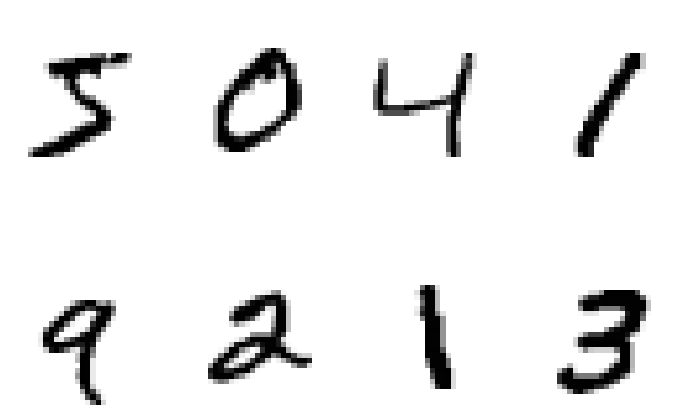

In [76]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i], cmap='gray_r')
    plt.title(y_train[i], color='white', fontsize=17)
    plt.axis('off')
plt.show()

Standaryzacja 

In [77]:
X_train = X_train / 255.
X_test = X_test / 255.
X_train.shape

(5000, 28, 28)

Wypłaszczenie obrazów

In [78]:
X_train = X_train.reshape(-1, 28 * 28)
X_train.shape

(5000, 784)

PCA - 3 komponenty

In [79]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[ 0.4555,  1.4465, -0.1264],
       [ 4.0677,  1.5158,  2.1634],
       [-0.1115, -1.7781, -0.6188],
       [-3.4395,  2.3377,  0.6106],
       [-1.4031, -2.6949, -0.1716]])

Wyjaśniona wariancja

In [80]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3


In [81]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=950, template='plotly_dark'))
fig.show()

In [82]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class
0,0.455464,1.446466,-0.126435,5.0
1,4.067743,1.515788,2.163415,0.0
2,-0.111540,-1.778070,-0.618783,4.0
3,-3.439491,2.337707,0.610641,1.0
4,-1.403055,-2.694929,-0.171649,9.0


Wizualizacja 3D głównych komponentów

In [83]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='class', 
              symbol='class', opacity=0.7, size_max=10, width=950, height=700, 
              template='plotly_dark', title='PCA - MNIST dataset')

In [84]:
pca = PCA(n_components=0.95) #zamiast liczby komponentów, podajemy % wariancji
#chcemy dopasować PCA tak aby wyjaśniało 95% wariancji danych

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:1]

array([[ 0.4555,  1.4464, -0.1266, -2.0464, -0.9062,  0.8658,  0.7143,  0.3843,  1.2169, -0.5736,  0.2233, -1.8176, -1.0697,  2.8846,  0.0435,
         0.4055, -1.3517, -0.4881,  0.7439,  1.2559,  0.491 ,  0.8971,  0.7157,  0.7823, -0.2474, -0.3642,  1.3117,  0.4369,  0.4515, -0.1556,
        -0.5905,  0.0318, -0.0879, -0.1545, -0.1757, -0.4434,  0.7237, -0.3561,  0.4432,  1.7112,  0.2673, -0.8439, -0.3894, -0.1528, -0.044 ,
        -0.5125, -0.6194, -0.1968,  0.2109, -0.3994,  0.3107, -0.0907,  0.1361, -0.5926,  0.0147,  0.7161,  0.497 ,  0.6163, -0.2884, -0.1627,
         0.5686, -0.1277,  0.6545, -0.3407,  0.7817,  0.2586, -0.0567, -0.2488, -0.3312, -0.1065, -0.0352, -0.6306,  0.0124, -0.2624, -0.3622,
        -0.29  ,  0.0276,  0.2364,  0.1238, -0.0304, -0.0702, -0.2134, -0.0943,  0.0714, -0.4736, -0.3605, -0.2183,  0.1694, -0.233 , -0.1073,
         0.2171, -0.0678,  0.043 ,  0.2504, -0.0245, -0.1631,  0.0138,  0.2231,  0.3506,  0.0314, -0.5392, -0.0519, -0.2189,  0.1758, -0.036 ,

In [85]:
pca.n_components_

148

Wyjaśniona wariancja

In [86]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.098676,0.098676,1
1,0.074045,0.172721,2
2,0.061277,0.233998,3
3,0.054053,0.288051,4
4,0.047376,0.335427,5
...,...,...,...
143,0.000497,0.948219,144
144,0.000491,0.948711,145
145,0.000482,0.949193,146
146,0.000473,0.949665,147


In [87]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 komponenty', width=950, template='plotly_dark'))
fig.show()

### <a name='6'></a> Zbiór danych Cifar

In [88]:
from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (50000, 32, 32, 3)
X_test shape: (10000, 32, 32, 3)
y_train shape: (50000, 1)
y_test shape: (10000, 1)


Obcięcie do pierwszych 5000 obrazów

In [89]:
X_train = X_train[:5000]
y_train = y_train[:5000]
X_train[0].shape

(32, 32, 3)

In [90]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Wizualizacja 

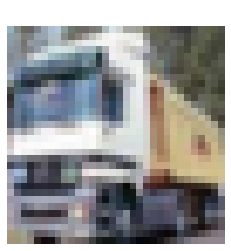

In [91]:
targets = {0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
           5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}

plt.imshow(X_train[1])
plt.title(targets[y_train[1][0]], color='white', fontsize=17)
plt.axis('off')
plt.show()

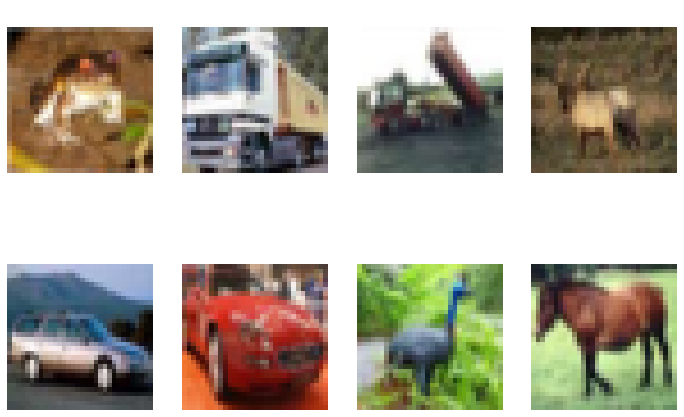

In [92]:
plt.figure(figsize=(12, 8))
for i in range(8):
    plt.subplot(240 + i + 1)
    plt.imshow(X_train[i])
    plt.title(targets[y_train[i][0]], color='white', fontsize=17)
    plt.axis('off')
plt.show()

Standaryzacja

In [106]:
X_train = X_train / 255
X_test = X_test / 255
X_train.shape

(5000, 3072)

Wypłaszczenie obrazów

In [107]:
X_train = X_train.reshape(-1, 32 * 32 * 3)
X_train.shape

(5000, 3072)

In [108]:
X_train[:5]

array([[0.0009, 0.001 , 0.001 , ..., 0.0019, 0.0014, 0.0011],
       [0.0024, 0.0027, 0.0029, ..., 0.0022, 0.002 , 0.0022],
       [0.0039, 0.0039, 0.0039, ..., 0.0012, 0.0013, 0.0013],
       [0.0004, 0.0004, 0.0002, ..., 0.0011, 0.001 , 0.0007],
       [0.0026, 0.0028, 0.003 , ..., 0.0011, 0.0012, 0.0012]])

PCA - 3 komponenty

In [109]:
pca = PCA(n_components=3)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[-0.0255,  0.01  ,  0.0062],
       [ 0.0034, -0.0034,  0.0244],
       [ 0.0318, -0.0439, -0.0106],
       [-0.0406, -0.0009,  0.0049],
       [-0.0097, -0.019 ,  0.0049]])

Wyjaśniona wariancja

In [110]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3


In [111]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title='PCA - 3 components', width=950, template='plotly_dark'))
fig.show()

In [112]:
X_train_pca_df = pd.DataFrame(np.c_[X_train_pca, y_train], columns=['pca_1', 'pca_2', 'pca_3', 'class'])
X_train_pca_df['name'] = X_train_pca_df['class'].map(targets)
X_train_pca_df['class'] = X_train_pca_df['class'].astype('str')
X_train_pca_df.head()

,pca_1,pca_2,pca_3,class,name
0,-0.025499,0.010002,0.006185,6.0,frog
1,0.003415,-0.003418,0.024378,9.0,truck
2,0.031808,-0.043901,-0.010554,9.0,truck
3,-0.040597,-0.000939,0.004911,4.0,deer
4,-0.009655,-0.018960,0.004894,1.0,automobile


Wizualizacja 3D głównych komponentów

In [113]:
px.scatter_3d(X_train_pca_df, x='pca_1', y='pca_2', z='pca_3', color='name', 
              symbol='name', opacity=0.7, size_max=10, width=950, height=700,
              title='PCA - CIFAR dataset', template='plotly_dark')

PCA - 0.95% wariancji

In [114]:
pca = PCA(n_components=0.95)

X_train_pca = pca.fit_transform(X_train)
X_train_pca[:5]

array([[-0.0255,  0.01  ,  0.0062, ..., -0.0008,  0.0004, -0.0001],
       [ 0.0034, -0.0034,  0.0244, ..., -0.0012,  0.0011, -0.0026],
       [ 0.0318, -0.0439, -0.0106, ..., -0.0011,  0.001 ,  0.0002],
       [-0.0406, -0.0009,  0.0049, ...,  0.    ,  0.0002,  0.0001],
       [-0.0097, -0.019 ,  0.0049, ...,  0.0004,  0.0009, -0.0001]])

In [102]:
pca.n_components_

203

In [103]:
pca.explained_variance_ratio_

array([0.2919, 0.1125, 0.0664, 0.0371, 0.0354, 0.0288, 0.0265, 0.0219, 0.0211, 0.0145, 0.0135, 0.0105, 0.0105, 0.0101, 0.0091, 0.0085, 0.0075,
       0.0071, 0.0067, 0.0066, 0.0062, 0.0058, 0.0051, 0.0049, 0.0048, 0.0047, 0.0046, 0.0045, 0.0041, 0.004 , 0.0037, 0.0034, 0.0032, 0.0032,
       0.0031, 0.003 , 0.0027, 0.0026, 0.0025, 0.0025, 0.0025, 0.0024, 0.0023, 0.0022, 0.0021, 0.0021, 0.0019, 0.0019, 0.0018, 0.0018, 0.0018,
       0.0017, 0.0017, 0.0017, 0.0017, 0.0016, 0.0016, 0.0016, 0.0015, 0.0015, 0.0015, 0.0014, 0.0014, 0.0014, 0.0014, 0.0013, 0.0013, 0.0013,
       0.0012, 0.0012, 0.0012, 0.0012, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.0011, 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 , 0.001 ,
       0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0009, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0008, 0.0007, 0.0007,
       0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0007, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006, 0.0006,

Wariancja wyjaśniona

In [104]:
results = pd.DataFrame(data={'explained_variance_ratio': pca.explained_variance_ratio_})
results['cumulative'] = results['explained_variance_ratio'].cumsum()
results['component'] = results.index + 1
results.head()

,explained_variance_ratio,cumulative,component
0,0.291944,0.291944,1
1,0.112451,0.404395,2
2,0.066359,0.470754,3
3,0.037136,0.507891,4
4,0.035443,0.543334,5


In [105]:
fig = go.Figure(data=[go.Bar(x=results['component'], y=results['explained_variance_ratio'], name='explained_variance_ratio'),
                      go.Scatter(x=results['component'], y=results['cumulative'], name='cumulative')],
                layout=go.Layout(title=f'PCA - {pca.n_components_} components', width=950, template='plotly_dark'))
fig.show()